# Simulations of Select Conjugate Priors and How They Update
&nbsp;&nbsp;*Likelihood: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;Parameter: *
    <br>(1) Normal &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Normal
    <br>(2) Binomial &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Beta 
    <br>(3) Poisson &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Gamma 
    <br>(4) Exponential - Gamma 
     

####  Imports
And inputs for plotting
<br>NB I have re-used symbols like "n" and "ess" across the different distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy.stats as stat
import scipy.special as ss

In [13]:
theta_1 = np.arange(0, 1, 0.01) # For parameters that are probabilities  
theta_2 = np.arange(0, 10, 0.05) # Poisson lambda
theta_3 = np.arange(90, 110, 0.01) # Normal Mu 
theta_4 = np.arange(70,130,0.01) # Normal Predictive

# Note to self: if you make key parameters below interractive (user inputs) then make sure graphs scale accordingly

#### (1) Normal Likelihood (known variance) conjugated by Normal prior for mean

data size (prior=400): 100
data mean (prior=100): 140


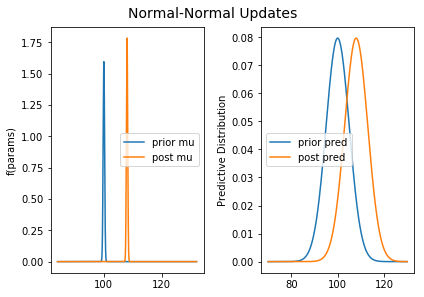

s_0: 0.25, m_0: 100, s_1: 0.22360679774997896, m_1: 107.99999999999999, Effective Sample Size: 400.0


In [162]:
# Normal Likelihood (known variance) - Normal Prior for mu (parameter)

# Likelihood (Prior)
# mu = mu (unknown)
sigma = 5
# likelihood = stat.norm.pdf(theta_3, mu, sigma)

# Prior Parameter (Mu)
m_0, s_0 = 100, np.sqrt(1/16)

# Effective Prior Sample Size = sigma^2 / s^2 = 400
ess = (sigma/s_0)**2

# Observe
n, x_bar = 200, 130 # 50, 130 works ok
n, x_bar = int(input("data size (prior=400): ")), float(input("data mean (prior=100): "))

# Scale plots accordingly
centre = (x_bar*n+m_0*ess)/(n+ess)
radius = abs(m_0-x_bar)*0.6
theta_3 = np.arange(centre-radius, centre+radius, 0.01) # Normal Mu 

# Priod Distribution for Param (mu)
prior_param = stat.norm.pdf(theta_3, m_0, s_0)

# Prior Predictive Distribution
prior_pred = stat.norm.pdf(theta_4, m_0, np.sqrt(sigma**2+s_0**2))

# --- Perform the observation ---
# Updated parameters:
s_1 = np.sqrt((n/sigma**2 + 1/s_0**2)**-1)
m_1 = (n*x_bar/sigma**2 + m_0/s_0**2)*s_1**2


# Posterior Distribution for Parameter (Mu)
posterior_param = stat.norm.pdf(theta_3, m_1, s_1)

# Posterior Predictive Distribution
posterior_pred = stat.norm.pdf(theta_4, m_1, np.sqrt(sigma**2+s_1**2))


plt.subplot(1,2,1)
plt.plot(theta_3, prior_param, label="prior mu")
plt.plot(theta_3, posterior_param, label="post mu")
plt.ylabel("f(params)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(theta_4, prior_pred, label="prior")
plt.plot(theta_4, posterior_pred, label="post")
plt.ylabel("Predictive Distribution")
plt.legend()

plt.suptitle("Normal-Normal Updates", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# If interested, here are the updated parameters as well as original ef. sample size
s_1 = np.sqrt((n/sigma**2 + 1/s_0**2)**-1)
m_1 = (n*x_bar/sigma**2 + m_0/s_0**2)*s_1**2
print("s_0: %r, m_0: %r, s_1: %r, m_1: %r, Effective Sample Size: %r" %(s_0,m_0,s_1,m_1,(sigma/s_0)**2))

#### (2) Binomial likelihood conjugated by Beta distributions for parameter

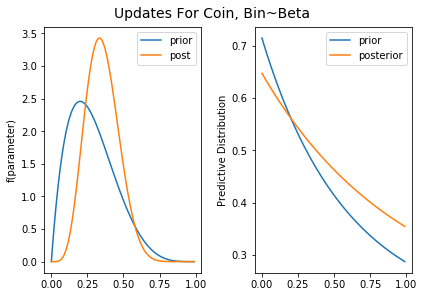

prior exp. param: 0.2857142857142857 , data mean: 0.4 , post exp. param: 0.35294117647058826


In [166]:
# Binomial-Beta, ef sample size = Alpha+Beta; mean=alpha/(alpha+beta)

# Prior Parameters for Parameter
alpha, beta = 2, 5 # then 20,50 to see how little difference data makes when relative sample size is imbalanced
ess = alpha + beta # effective sample size
prior_mean = alpha/ess

# Prior parameter distribution
a=stat.beta.pdf(theta_1,alpha,beta)

# Observe
n, x = 10, 4 # Randomly generate this or make user input?

# Update parameters
alpha_1 = alpha + x
beta_1 = beta + n - x
post_ess = alpha_1 + beta_1
post_mean = alpha_1/post_ess

# Posterior parameter distribution
b=stat.beta.pdf(theta_1,alpha_1,beta_1)


# Marginals
# Prior
def marg_prior(y):
    return ss.gamma(alpha+y) * ss.gamma(beta-y+1) * ss.gamma(alpha+beta) \
    / ss.gamma(alpha+beta+1) / ss.gamma(alpha) / ss.gamma(beta)
# Posterior
def marg_posterior(y):
    return ss.gamma(alpha_1+y) * ss.gamma(beta_1-y+1) * ss.gamma(alpha_1+beta_1) \
    / ss.gamma(alpha_1+beta_1+1) / ss.gamma(alpha_1) / ss.gamma(beta_1)
    

    
# Plot Parameter prior and posterior distributions
# subplot(rows, cols, index)
plt.subplot(1,2,1)
plt.plot(theta_1, a, label="prior")
plt.plot(theta_1, b, label="post")
plt.ylabel("f(parameter)")
plt.legend()

# Plot Marginals
plt.subplot(1,2,2)
plt.plot(theta_1, marg_prior(theta_1), label="prior")
plt.plot(theta_1, marg_posterior(theta_1), label="posterior")
plt.ylabel("Predictive Distribution")
plt.legend()

plt.suptitle("Updates For Coin, Binomial~Beta",
             y=1.02,
             fontsize=14)

plt.tight_layout()
plt.show()

print("prior exp. param: %r , data mean: %r , post exp. param: %r" %(prior_mean, x/n, post_mean))

#### (3) Poisson likelihood conjugated by gamma distributions for parameter

As a prior, effective sample size is 10, expected rate is 5.0. 
Choose data sample size (integer): 5


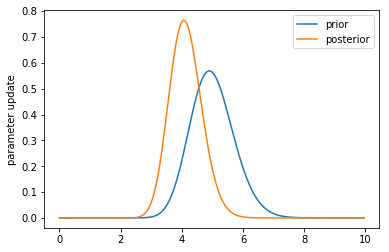

Prior mean: 5.0, posterior mean: 4.1333333333333337.


In [16]:
# Let user input data informativeness
# Suppose X = number of buses come every hour, God's eye view tells us this is 3. (True lambda=3.)
# As a prior (gamma) we optimistically go for 5 buses, then do some observing.


# Poi-Gam, ef sample size = Beta
#mean=alpha/beta (mean of underlying is the parameter)
alpha, beta = 50, 10
ess = beta # 10
prior_mean = alpha/ess # expected=0.4, equivalent to lambda=2.5
print("As a prior, effective sample size is %r, expected rate is %r. " %(ess, prior_mean))
# Prior guess at lambda = 5.
a=stat.gamma.pdf(theta_2, a=alpha, loc=0, scale = 1/beta) #the prior pdf of the hyperparameters


n = int(input("Choose data sample size (integer): "))
x = sum(stat.poisson.rvs(mu=3,loc=0, size=n)) # poisson random variable for n trials, lambda=3
# Observe (number of independent intervals = n, total observations = x)
##### delete this n, x = 25, 10 # make these make sense, consider means (10,17 shifts right, spreads out)
alpha_1 = alpha+x
beta_1 = beta+n
ess_posterior = beta_1
posterior_mean = alpha_1/ess_posterior

b=stat.gamma.pdf(theta_2, a=alpha_1, loc=0, scale = 1/beta_1)
plt.plot(theta_2, a, label="prior")
plt.plot(theta_2, b, label="posterior")
plt.ylabel("parameter update")
plt.legend()
plt.show()

print ("Prior mean: %r, posterior mean: %r." %(prior_mean, posterior_mean))


#### (4) Exponential likelihood conjugated by Gamma distributions for parameter

Input data size (prior effective size is 4): 10


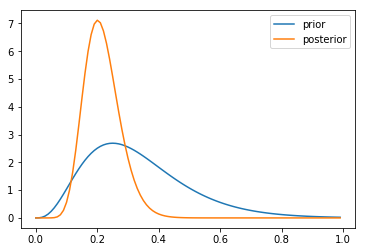

In [26]:
# Let X be time between earthquakes; God's-eye-view tells us 5 years.
# X is modelled by an Exponential distribution, parameter 1/5 = 0.2.
# This parameter is Gamma, hyperparameters alpha and beta.
# Our scientists begin with a cautious prior expectation of 3 years.


# Exp-Gam, ef sample size = Alpha
# mean param =alpha/beta (mean of underlying is reciprocal of param)
alpha, beta = 4, 12 # consistent with prior expectation of a typical interval of 3 years
ess = alpha # effective sample size = 4
a=stat.gamma.pdf(theta_1, a=alpha, loc=0, scale = 1/beta)


# Observe (number of independent intervals = n, total observations = x)
n = int(input("Input data size (prior effective size is %r): " %(ess)))
#stat.expon.rvs(loc=0,scale=3,size=10000)
x = sum( stat.expon.rvs(loc=0,scale=3,size=n) )
alpha_1 = alpha+n
beta_1 = beta+x
b=stat.gamma.pdf(theta_1, a=alpha_1, loc=0, scale = 1/beta_1)
plt.plot(theta_1, a, label="prior")
plt.plot(theta_1, b, label="posterior")
plt.ylabel("Parameter update")
plt.legend()
plt.show()